In [ ]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'fashionmnist:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2243%2F9243%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T142812Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D02c0c319877c6b9a404a680c5f452a2c56752c9dc5a762489048ebb1f6d9f9e45aa4eac4bca27bcd66af7f5ad13e64303c98313a9387bfe804d8e662d66e6b2c7e7639f34f25cbb2cfd0d2f75e3a6bf75b63c419084ad755b74d8f73b71c0e5ad9fcc4a50fb48067786e9ff50c00248432ffe3cf15670dd30891a1b40b856efac11689b0c5747e0229bd83fbd5e07c6cca3e69a96fb43ebefe66e7938c98241491193070e69c9c9b305f2172ff6e54f9018df78941d78afe8bdcb8d3dfacc2aaa9bca08c8c0d4a1e0d2ffeda138a355f148c194ad4fc1913eef99f9fdbedc755ab87781d4a7994387ffdb7d84e7a4475c16874681e06f5be59346fdd5e69b7ce'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [3]:
import os
os.chdir('/kaggle/input/fashionmnist')

In [4]:
!ls

fashion-mnist_test.csv	 t10k-images-idx3-ubyte  train-images-idx3-ubyte
fashion-mnist_train.csv  t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [ ]:
df = pd.read_csv('fashion-mnist_train.csv')

In [ ]:
df.head()

In [ ]:
y = df['label']

In [ ]:
X = df.drop('label', axis=1)

In [ ]:
type(X)

In [ ]:
X = X/255

In [ ]:
y.value_counts()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix

In [ ]:
classification_report(y_test, pred)

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
print(f'Accuracy is {accuracy_score(y_test,pred)}')

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()


In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
xg_pred = model.predict(X_test)

In [ ]:
print(f'Accuracy is {accuracy_score(y_test,xg_pred)}')

In [ ]:
print(confusion_matrix(y_test, xg_pred))

In [ ]:
print(classification_report(y_test, xg_pred))

Let's go with NN and CNN now

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader,Dataset

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [9]:
from PIL import Image


In [ ]:
#Creating dataset for linear NN
class CustomDataset(Dataset):
  def __init__(self,csvfile,transform = None):
     super().__init__()
     self.data = pd.read_csv(csvfile)
     self.labels = self.data['label']
     self.images = self.data.drop('label', axis=1)
     self.transform = transform
     #There is another way to do the above using self.data.iloc[:,0] and iloc[:,1:]
  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    image = torch.tensor(self.images.iloc[idx].values,dtype = torch.float32)
    # image = image.reshape(1,28,28)
    # image = Image.fromarray(image, mode='L')

    label = torch.tensor(self.labels.iloc[idx],dtype = torch.long)

    if self.transform:
      image = self.transform(image)


    return image, label


In [ ]:

train_dataset = CustomDataset('fashion-mnist_train.csv')
test_dataset = CustomDataset('fashion-mnist_test.csv')

In [ ]:
train_dataloader = DataLoader(train_dataset,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_dataset,batch_size = 64,shuffle = False)


In [ ]:
#Creating module
class neural_net(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearnet = nn.Sequential(
        nn.Linear(784,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):
    x = x.view(x.size(0), -1)  # Convert 28x28 image to 784 vector

    x = self.linearnet(x)

    return x
    # self.fc1 = nn.Linear(784,128)


In [ ]:
model = neural_net().to(device)

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary

In [ ]:
summary(model,(1,784))

In [ ]:
from torch.optim import Adam

loss_fn = nn.CrossEntropyLoss()
opt = Adam(model.parameters(),lr = 0.001)

In [10]:
#Neural network loop
train_losses,test_losses = [],[]
train_accs,test_accs = [],[]
#Train loop
for epoch in range(10):
  train_loss,test_loss = 0,0
  train_acc,test_acc = 0,0
  model.train()
  for batch,(x,y) in enumerate(train_dataloader):
    x,y =x.to(device),y.to(device)
    pred = model(x)
    loss = loss_fn(pred,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_loss += loss.item()
    train_acc += ((y==pred.argmax(dim=1)).sum().item())/len(y)
  train_losses.append(train_loss/len(train_dataloader))
  train_accs.append(train_acc/len(train_dataloader))
  print(f'Current epoch is {epoch}, train loss: {train_loss/len(train_dataloader)} train_acc: {train_acc/len(train_dataloader)}')

  #Test loop
  model.eval()
  with torch.no_grad():
    for batch,(x,y) in enumerate(test_dataloader):
      x,y = x.to(device),y.to(device)
      test_pred = model(x)
      loss_t = loss_fn(test_pred,y)
      test_loss += loss_t.item()
      test_acc += ((y==test_pred.argmax(dim=1)).sum().item())/len(y)
    test_losses.append(test_loss/len(test_dataloader))
    test_accs.append(test_acc/len(test_dataloader))
    print(f'Current epoch is {epoch}, test loss: {test_loss/len(test_dataloader)} test_acc: {test_acc/len(test_dataloader)}')

    # train_acc = (pred.)


NameError: name 'model' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label = 'train')
plt.plot(test_losses,label = 'test')
plt.legend()

In [ ]:
plt.plot(train_accs,label = 'train')
plt.plot(test_accs,label = 'test')
plt.legend()

Creating a CNN

In [5]:
img = df.iloc[100][1:]

NameError: name 'df' is not defined

In [ ]:
plt.imshow(img.values.reshape(28,28))
df.iloc[100][0]

In [11]:
#Creating dataset for CNN
class CustomDataset(Dataset):
  def __init__(self,csvfile,transform = None):
     super().__init__()
     self.data = pd.read_csv(csvfile)
     self.labels = self.data['label']
     self.images = self.data.drop('label', axis=1)
     self.transform = transform
     #There is another way to do the above using self.data.iloc[:,0] and iloc[:,1:]
  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    image = torch.tensor(self.images.iloc[idx].values,dtype = torch.float32)
    image = image.reshape(1,28,28)
    # image = Image.fromarray(image, mode='L')

    label = torch.tensor(self.labels.iloc[idx],dtype = torch.long)

    if self.transform:
      image = self.transform(image)


    return image, label


In [12]:

train_dataset = CustomDataset('fashion-mnist_train.csv')
test_dataset = CustomDataset('fashion-mnist_test.csv')

In [13]:
train_dataloader = DataLoader(train_dataset,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_dataset,batch_size = 64,shuffle = False)


In [34]:
#Creating module
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearnet = nn.Sequential(
        # nn.Flatten(),
        nn.Conv2d(in_channels=1,out_channels=64,kernel_size=3),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Dropout(0.25),
        
        #Layer 2
        nn.Conv2d(64,128,3),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Dropout(0.25),
        
        #Layer 3
        nn.Conv2d(128,64,3),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
        nn.ReLU(),
        
        #Linear FCN
        nn.Flatten(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Dropout(0.2),
        
        nn.Linear(128,256),
        nn.ReLU(),
        nn.Dropout(0.2),
        
        nn.Linear(256,64),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(64,10)
    )

  def forward(self,x):
    x = self.linearnet(x)

    return x
    # self.fc1 = nn.Linear(784,128)


In [35]:
cnn_model = CNN().to(device)

In [26]:
pip install torchsummary

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [36]:
cnn_model

CNN(
  (linearnet): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Dropout(p=0.25, inplace=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Dropout(p=0.25, inplace=False)
    (10): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): ReLU()
    (14): Flatten(start_dim=1, end_dim=-1)
    (15): Linear(in_features=64, out_features=128, bias=True)
    (16): ReLU()
    (17): Dropou

In [27]:
from torchsummary import summary

In [37]:
summary(cnn_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]             640
       BatchNorm2d-2           [-1, 64, 26, 26]             128
         MaxPool2d-3           [-1, 64, 13, 13]               0
              ReLU-4           [-1, 64, 13, 13]               0
           Dropout-5           [-1, 64, 13, 13]               0
            Conv2d-6          [-1, 128, 11, 11]          73,856
       BatchNorm2d-7          [-1, 128, 11, 11]             256
         MaxPool2d-8            [-1, 128, 5, 5]               0
              ReLU-9            [-1, 128, 5, 5]               0
          Dropout-10            [-1, 128, 5, 5]               0
           Conv2d-11             [-1, 64, 3, 3]          73,792
      BatchNorm2d-12             [-1, 64, 3, 3]             128
        MaxPool2d-13             [-1, 64, 1, 1]               0
             ReLU-14             [-1, 6

In [38]:
from torch.optim import Adam
loss_fn = nn.CrossEntropyLoss()
opt = Adam(cnn_model.parameters(),lr = 1e-04)

In [ ]:
# Define the early stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        """
        Args:
            patience (int): How many epochs to wait after the last time the validation loss improved.
            min_delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss):
        # Check if the validation loss has improved
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True



In [ ]:
early_stopping = EarlyStopping(patience=5, min_delta=0.01)


In [40]:
#Neural network loop
train_losses,test_losses = [],[]
train_accs,test_accs = [],[]
#Train loop
for epoch in range(10):
  train_loss,test_loss = 0,0
  train_acc,test_acc = 0,0
  cnn_model.train()
  for batch,(x,y) in enumerate(train_dataloader):
    x,y =x.to(device),y.to(device)
    pred = cnn_model(x)
    loss = loss_fn(pred,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_loss += loss.item()
    train_acc += ((y==pred.argmax(dim=1)).sum().item())/len(y)
  train_losses.append(train_loss/len(train_dataloader))
  train_accs.append(train_acc/len(train_dataloader))
  print(f'Current epoch is {epoch}, train loss: {train_loss/len(train_dataloader)} train_acc: {train_acc/len(train_dataloader)}')

  #Test loop
  cnn_model.eval()
  with torch.no_grad():
    for batch,(x,y) in enumerate(test_dataloader):
      x,y = x.to(device),y.to(device)
      test_pred = cnn_model(x)
      loss_t = loss_fn(test_pred,y)
      test_loss += loss_t.item()
      test_acc += ((y==test_pred.argmax(dim=1)).sum().item())/len(y)
    test_losses.append(test_loss/len(test_dataloader))
    test_accs.append(test_acc/len(test_dataloader))
    print(f'Current epoch is {epoch}, test loss: {test_loss/len(test_dataloader)} test_acc: {test_acc/len(test_dataloader)}')# Early stopping check
# early_stopping(test_loss)
# if early_stopping.early_stop:
#         print("Early stopping triggered")
#         break
    # train_acc = (pred.)


Current epoch is 0, train loss: 0.5948305632958788 train_acc: 0.7835654317697228
Current epoch is 0, test loss: 0.4855264698623852 test_acc: 0.8176751592356688
Current epoch is 1, train loss: 0.5220221498850058 train_acc: 0.8121002132196162
Current epoch is 1, test loss: 0.42023600419615487 test_acc: 0.8491242038216561
Current epoch is 2, train loss: 0.4755829089899053 train_acc: 0.8311067430703625
Current epoch is 2, test loss: 0.3905072170458022 test_acc: 0.8580812101910829
Current epoch is 3, train loss: 0.44696822198532793 train_acc: 0.8409348347547975
Current epoch is 3, test loss: 0.3687067901252941 test_acc: 0.8637539808917197
Current epoch is 4, train loss: 0.424234849303516 train_acc: 0.8493636727078892
Current epoch is 4, test loss: 0.34609571607059736 test_acc: 0.8749004777070064
Current epoch is 5, train loss: 0.4054382775288655 train_acc: 0.8551439232409381
Current epoch is 5, test loss: 0.3559172258825059 test_acc: 0.868531050955414
Current epoch is 6, train loss: 0.39243

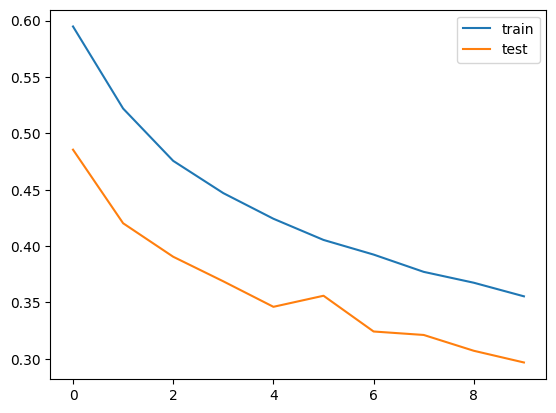

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label = 'train')
plt.plot(test_losses,label = 'test')
plt.legend()

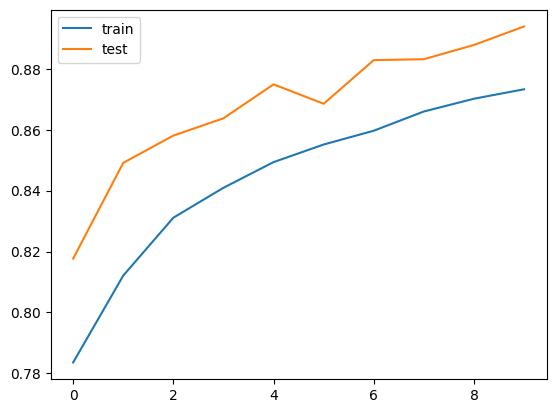

In [42]:
plt.plot(train_accs,label = 'train')
plt.plot(test_accs,label = 'test')
plt.legend()

Using transfer learning

In [ ]:
from torchvision import transforms,models,datasets


In [ ]:
tl_model = models.resnet50(pretrained=True)

In [ ]:
#freeze parameters
for param in tl_model.parameters():
  param.requires_grad = False

#modify the output layer
tl_model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
tl_model.fc = nn.Linear(2048,10)
tl_model = tl_model.to(device)

In [ ]:
tl_model.fc.in_features

Need to modify the images to (224,224)

In [ ]:
train_transform = transforms.Compose([transforms.Resize((224,224)),
                                   transforms.Grayscale(num_output_channels=3),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.RandomRotation(10),
                                   transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485], std=[0.229])])

test_transform = transforms.Compose([transforms.Resize((224,224)),
                                   transforms.Grayscale(num_output_channels=3),
                                   transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485], std=[0.229])])

In [ ]:
#Creating dataset
class CustomDataset(Dataset):
  def __init__(self,csvfile,transform = None):
     super().__init__()
     self.data = pd.read_csv(csvfile)
     self.labels = self.data['label']
     self.images = self.data.drop('label', axis=1)
     self.transform = transform
     #There is another way to do the above using self.data.iloc[:,0] and iloc[:,1:]
  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    image = torch.tensor(self.images.iloc[idx].values,dtype = torch.float32)
    image = image.reshape(28,28)
    image = Image.fromarray(image.numpy(), mode='L')

    label = torch.tensor(self.labels.iloc[idx],dtype = torch.long)

    if self.transform:
      image = self.transform(image)


    return image, label


In [ ]:

train_dataset = CustomDataset('fashion-mnist_train.csv',transform = train_transform)
test_dataset = CustomDataset('fashion-mnist_test.csv',transform = test_transform)

In [ ]:
train_dataloader = DataLoader(train_dataset,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_dataset,batch_size = 64,shuffle = False)


In [ ]:
# summary(tl_model,(3,224,224))

In [ ]:

loss_fn = nn.CrossEntropyLoss()
opt = Adam(tl_model.parameters(),lr = 1e-04)

In [ ]:
#Neural network loop
train_losses,test_losses = [],[]
train_accs,test_accs = [],[]
#Train loop
for epoch in range(30):
  train_loss,test_loss = 0,0
  train_acc,test_acc = 0,0
  tl_model.train()
  for batch,(x,y) in enumerate(train_dataloader):
    x,y =x.to(device),y.to(device)
    pred = tl_model(x)
    loss = loss_fn(pred,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_loss += loss.item()
    train_acc += ((y==pred.argmax(dim=1)).sum().item())/len(y)
  train_losses.append(train_loss/len(train_dataloader))
  train_accs.append(train_acc/len(train_dataloader))
  print(f'Current epoch is {epoch}, train loss: {train_loss/len(train_dataloader)} train_acc: {train_acc/len(train_dataloader)}')

  #Test loop
  tl_model.eval()
  with torch.no_grad():
    for batch,(x,y) in enumerate(test_dataloader):
      x,y = x.to(device),y.to(device)
      test_pred = tl_model(x)
      loss_t = loss_fn(test_pred,y)
      test_loss += loss_t.item()
      test_acc += ((y==test_pred.argmax(dim=1)).sum().item())/len(y)
    test_losses.append(test_loss/len(test_dataloader))
    test_accs.append(test_acc/len(test_dataloader))
    print(f'Current epoch is {epoch}, test loss: {test_loss/len(test_dataloader)} test_acc: {test_acc/len(test_dataloader)}')

    # train_acc = (pred.)


In [ ]:
pred.shape